In [37]:
#import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
df = pd.read_csv(r'C:\Users\Faizan\Downloads\archive (6)\spam.csv', encoding= 'latin-1')

In [39]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [40]:
df.drop(columns= ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace = True)

In [41]:
df.shape

(5572, 2)

In [42]:
df.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [44]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [45]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [46]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['target']=encoder.fit_transform(df['target'])

In [47]:
df.head()
# spam = 1
# ham = 0

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [48]:
df.drop_duplicates(keep='first', inplace = True)

<AxesSubplot:>

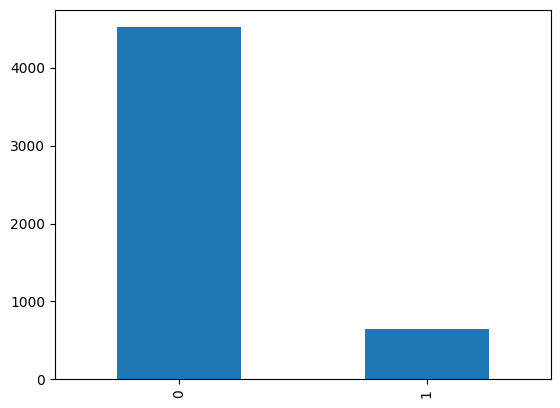

In [49]:
df['target'].value_counts().plot(kind='bar')

<AxesSubplot:ylabel='target'>

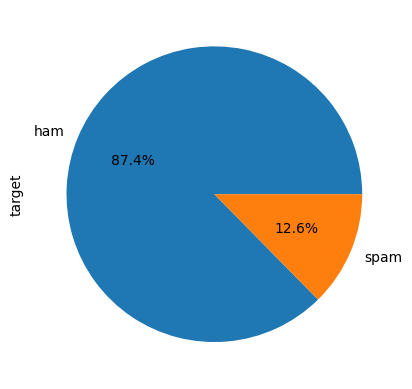

In [50]:
df['target'].value_counts().plot(kind='pie',labels=['ham','spam'],autopct='%1.1f%%')

In [51]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [52]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

# Function to transform the text
def transform_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Tokenize the text into individual words
    text = nltk.word_tokenize(text)
    
    # Create an empty list to store filtered words
    filtered_words = []
    
    # Iterate over each word in the text
    for word in text:
        # Check if the word contains only alphanumeric characters
        if word.isalnum():
            # Add the word to the filtered list
            filtered_words.append(word)
    
    # Update the text with the filtered words
    text = filtered_words[:]
    
    # Clear the filtered words list for reuse
    filtered_words.clear()
    
    # Remove stop words and punctuation from the text
    for word in text:
        # Check if the word is not a stop word or punctuation mark
        if word not in stopwords.words('english') and word not in string.punctuation:
            # Add the word to the filtered list
            filtered_words.append(word)
            
    # Update the text with the filtered words
    text = filtered_words[:]
    
    # Clear the filtered words list for reuse
    filtered_words.clear()
    
    # Apply stemming to the words in the text
    stemmer = PorterStemmer()
    for word in text:
        # Perform stemming on each word
        stemmed_word = stemmer.stem(word)
        # Add the stemmed word to the filtered list
        filtered_words.append(stemmed_word)
    
    # Join the filtered words to form the transformed text
    transformed_text = " ".join(filtered_words)
    
    # Return the transformed text
    return transformed_text

In [54]:
df['transformed_text'] = df['text'].apply(transform_text)

In [55]:
df.head()

,target,text,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though


In [56]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(df['transformed_text']).toarray()

In [57]:
X.shape

(5169, 6708)

In [60]:
y = df['target'].values

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [62]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [63]:
mnb = MultinomialNB()
mnb.fit(X_train,y_train)
y_pred1 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153
